<a href="https://colab.research.google.com/github/JonasLeijoto/Data_Science/blob/main/Rio_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Rio de Janeiro*

Quando pensamos em fazer uma viagem, a hospedagem é, normalmente, um dos itens que mais pesam no bolso na hora do planejamento econômico.

Rompendo a hegemonia dos hotéis, em 2008 surge a Startup **[Airbnb](https://www.airbnb.com.br/)** que veio com a promessa de conectar proprietários de imóveis (ou cômodos) vagos - chamados de anfitriões - com interessados em passar uma tem temporada fora de casa, mas sem deixar *um rim* na rede hoteleira.

<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

O sucesso foi tão grande que em 2018, a empresa já havia **hospedado 300 milhões de pessoas** em todo mundo, "forçando" até os próprios hotéis a ofereceram hospedagem na plataforma.

O portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) reúne uma quantidade enorme de dados da empresa nas principais cidades do mundo e, projetos de *Data Science* podem trazer diversos *Insights* sobre padrões de comportamento e preferências dos consumidores e anfitriões.


Neste *notebook*, iremos explorar os dados referentes à **Cidade Maravilhosa** para entender melhor as particularidades do Airbnb na região.

## Obtenção dos Dados

Os dados estudados foram obtidos no portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) e, por se tratar de um projeto exploratório inicial, escolheu-se o pacote dados resumidos, atualizados em 23 de dezembro de 2020, para a cidade do Rio de Janeiro. O banco de dados (arquivo csv) pode ser acessado diretamento [neste link](http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-12-23/visualisations/listings.csv).


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv ("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-12-23/visualisations/listings.csv")


## Análise dos Dados
Para que que tenhamos uma maior familiaridade com os dados, será elaborado um dicionário de variáveis, correspondentes a cada uma das colunas da base de dados.

Faz-se necessário também exibir o modelo de dados representados pelas 5 primerias colunas.

**Dicionário das variáveis**

* `id`: Número de identificação da acomodação;
* `name`: Nome da acomodação ofertado;
* `host_id`: Número de identificação do anfitrião;
* `host_name`: Nome do anfitrião;
* `neighbourhood_group`: Grupo de bairro da acomodação;
* `neighbourhood`: Nome do bairro da acomodação;
* `latitude`: Coordenada de latitude da acomodação;
* `longitude`: Coordenada de longitude da acomodação;
* `room_type`: Tipo da acomodação;
* `price`: Preço por noite pela acomodação;
* `minimum_nights`: Mínimo de noites para reserva da acomodação;
* `number_of_reviews`: Número total de reviews da acomodação;
* `last_review`: Último review da acomodação;
* `reviews_per_month`: Quantidade de reviews por mês;
* `calculated_host_listings_count`: Quantidade de acomodações do mesmo anfitrião;
* `availability_365`: Dias disponíveis da acomodação em 365 dias.


In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,500,5,259,2020-12-26,2.03,1,0
1,25026,Beautiful Modern Decorated Studio in Copa,3746246,Ghizlane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,238,2020-02-15,1.85,11,335
2,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,259,2,181,2020-03-15,2.07,1,267
3,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,157,3,346,2020-12-20,2.78,1,89
4,41198,"Modern 2bed,Top end of Copacabana",178975,Nicky,NaN,Copacabana,-22.97962,-43.19230,Entire home/apt,1035,3,18,2016-02-09,0.19,2,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Para avaliar a qualidade dos dados e suas características, as entradas e variáveis foram quantificadas. O tipo de dado de cada variável também foi explorada e os resultados estão apresentados abaixo. Todas as varáveis estão com seu tipo de dado adequados.

In [4]:
# identificar o volume de dados do DataFrame
print("Entradas: \t {}".format(df.shape[0]))
print("Variáveis: \t {}\n".format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas: 	 25784
Variáveis: 	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Em um banco de dados, a quantidade de entradas vazias impactam, diretamente, a qualidade da análise obtida. As funções `isnull().sum() ` foram usadas para esse fim.








In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

neighbourhood_group               1.000000
reviews_per_month                 0.385200
last_review                       0.385200
name                              0.001125
host_name                         0.000310
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Conclusões:
* A coluna de neighbourhood_group está inteiramente fazia e será excluída do banco de dados.
* As colunas de '**reviews_per_month**' e 'last_reviews' têm quase 40% de dados faltantes, porém não serão avaliados nesse projeto. Por isso não impactará nas análises realizadas. O mesmo vale para as colunas de 'name' e 'host_name' que apresentam menos de 1% das suas entradas faltantes.

### **Q3. Qual o tipo de distribuição das variáveis?**

A distribuição das variáveis é uma característica do *dataset* pois nos mostram, superficialmente, a hegemonia dos dados e se são representativos da situação.
Para isso, escolheu-se a representação em histogramas para todas as variáveis numéticas conforme mostrado abaixo.

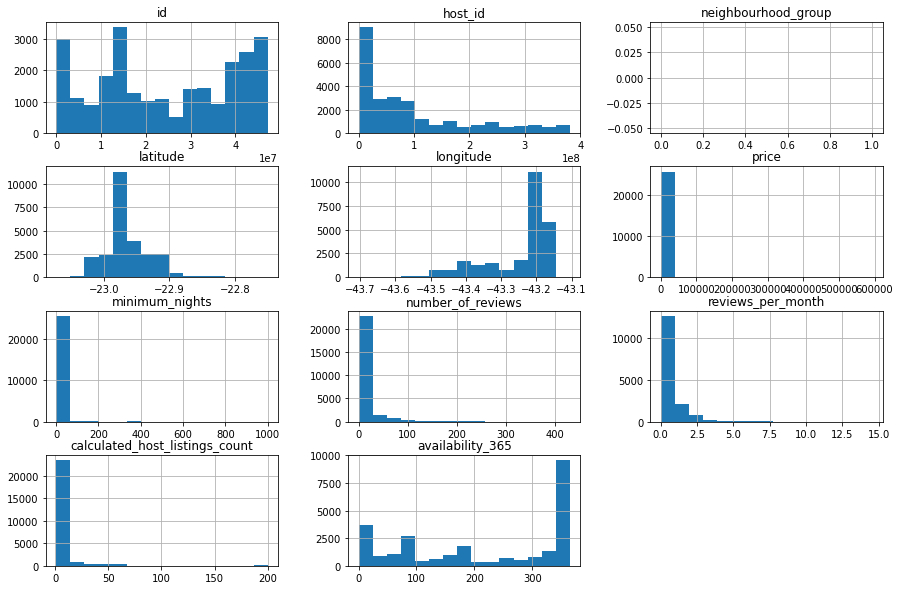

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

Com a análise dos histogramas, percebe-se que as variáveis 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', calculated_host_listings_count', 'availability_365' precisam ser melhor investigados para avaliar a existência de valores não representativos (outliers).

### **Q4. Existem outliers?**

In [7]:
# Ver resumo estatístico das entradas numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,25784.000000,25784.000000,25784.000000,15852.000000,25784.000000,25784.000000
mean,879.820664,4.767491,11.960479,0.590130,6.582532,215.296114
std,5179.764367,19.042074,29.371931,0.819468,19.995586,140.893876
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,200.000000,1.000000,0.000000,0.100000,1.000000,83.000000
50%,380.000000,2.000000,1.000000,0.240000,1.000000,247.000000
75%,776.000000,4.000000,9.000000,0.780000,3.000000,359.000000
max,593266.000000,1000.000000,431.000000,14.550000,200.000000,365.000000


Com o resumo estatístico das variáveis investigadas, infere-se que:
* Para a variável **price**, apesar da média ser de `R$879,82`, o desvio padrão extremamente alto mostra que as entradas distam bastante desta média. Essa percepção é confimada pelo valor máximo de diária ser de `R$593266,00` enquanto o *Q3* ser `R$776,00`. Para confirmar usaremos exibição em boxplot para determinar os dados que serão retirados da nossa base de dados.
* O mesmo raciocínio pode ser aplicado a variável **minimum_nights**, porém, apesar de existirem outliers, o desvio padrão mais baixo indica que essas entradas distoantes são bem menos impactantes da qualidade dos dados. A exibição em boxplot trará mais clareza dessa conclusão.

#### Boxplot para minimum_nights

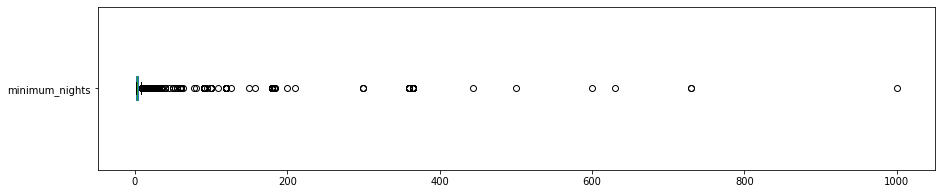


Minimum_night:

Valores acima de 30 dias: 199 entradas
0.7718% do total de entradas


In [8]:
df.minimum_nights.plot(kind='box', vert = False, figsize=(15,3))
plt.show()

print("\nMinimum_night:\n")
print("Valores acima de 30 dias: {} entradas".format(len(df[df.minimum_nights>30])))
print("{:.4f}% do total de entradas".format((len(df[df.minimum_nights>30])/df.shape[0])*100))


#### Boxplot para price

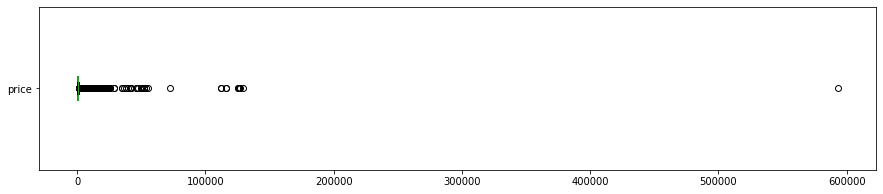


Price:

Valores acima de 1500 dias: 2455 entradas
9.5214% do total de entradas


In [9]:
df.price.plot(kind='box', vert = False, figsize=(15,3))
plt.show()
preco = 1500
print("\nPrice:\n")
print("Valores acima de 1500 dias: {} entradas".format(len(df[df.price>preco])))
print("{:.4f}% do total de entradas".format((len(df[df.price>preco])/df.shape[0])*100))


#### Hitogramas sem outliers

Os outliers serão excluídos da base de dados e os histogramas reavaliados.

,price,minimum_nights
count,23146.000000,23146.000000
mean,444.227685,3.526959
std,338.089814,4.218445
min,32.000000,1.000000
25%,190.000000,1.000000
50%,340.000000,2.000000
75%,600.000000,4.000000
max,1500.000000,30.000000


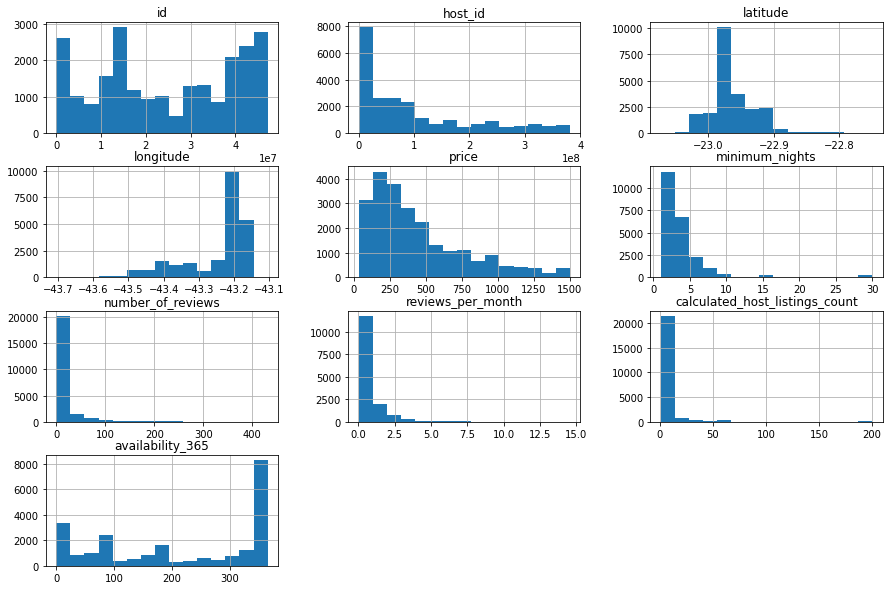

In [10]:
#remover os outliers em um novo DataFrame
df_trat = df.copy()
df_trat.drop(df_trat[df_trat.price > 1500].index, axis = 0, inplace = True)
df_trat.drop(df_trat[df_trat.minimum_nights > 30].index, axis = 0, inplace = True)
df_trat.drop(df_trat[df_trat.price == 0].index, axis = 0, inplace = True)

 #remover coluna vazia neighbourhood_group 
df_trat.drop('neighbourhood_group', axis = 1, inplace = True) 
           
df_trat.hist(bins = 15, figsize=(15,10));

# ver dados estatisticos das colunas tratadas
df_trat[['price', "minimum_nights"]].describe()

### **Q5. Qual a correlação existente entre as variáveis**

Essa sesão busca encontrar tendencias entre as variáveis e como elas se relacionam.

In [11]:
# criar uma matriz de correlação
corr = df_trat[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.093589,-0.079945,-0.075201,0.171183,0.048557
minimum_nights,0.093589,1.000000,-0.069664,-0.102222,-0.029659,-0.002980
number_of_reviews,-0.079945,-0.069664,1.000000,0.644582,-0.034988,-0.076533
reviews_per_month,-0.075201,-0.102222,0.644582,1.000000,0.003108,-0.154244
calculated_host_listings_count,0.171183,-0.029659,-0.034988,0.003108,1.000000,0.008622
availability_365,0.048557,-0.002980,-0.076533,-0.154244,0.008622,1.000000


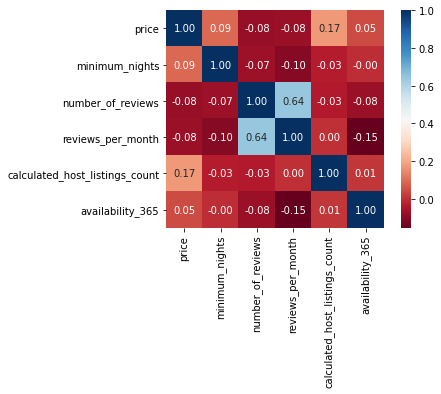

In [12]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap = "RdBu", fmt = '.2f', square = True, linecolor = 'white', 
            annot = True);

O mapa de calor foi plotado para evidenciar possíveis correlações. As variáveis **number_of_reviews** e **reviews_per_month** tem uma quase obvia correlação, porém nenhuma das outras variáveis apresentaram correlação positiva significativa.

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

In [13]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_trat.room_type.value_counts()

Entire home/apt    16201
Private room        6268
Shared room          579
Hotel room            98
Name: room_type, dtype: int64

In [14]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_trat.room_type.value_counts() / df_trat.shape[0]

Entire home/apt    0.699948
Private room       0.270803
Shared room        0.025015
Hotel room         0.004234
Name: room_type, dtype: float64

O *dataset* mostra que **quase 70%** dos anuncios para o Rio de Janeiro são de **moradias completas** e **quase 30%** de **quartos privativos**. Esse perfil mostra que as habitações para o Rio de Janeiro atendem a um vasto publico. Aqueles que buscam economizar em hospedagem no Rio, tem 6268 opções de quartos privativos que são mais baratos que os imóveis completos.

### **Q7. Qual a localidade mais cara do dataset?**

É possível identificar as localidades mais caras oferecidas na plataforma, agrupando pelos bairros e utilizando a função `mean() ` e ordenando pelo `sort_values`.






In [15]:
# ver preços por bairros, na média
bairrosmais = df_trat.groupby(['neighbourhood']).price.mean().sort_values(ascending = False)[:20]
bairrosmais

neighbourhood
Vista Alegre                1262.000000
Grumari                     1003.000000
Cavalcanti                   925.000000
Anchieta                     800.000000
Vaz Lobo                     797.000000
Cacuia                       795.000000
Osvaldo Cruz                 780.000000
Leblon                       650.875000
Ipanema                      599.598925
Lagoa                        593.735577
Manguinhos                   593.000000
Freguesia (Ilha)             580.666667
Barra da Tijuca              546.212971
Realengo                     543.200000
Vigário Geral                532.500000
Alto da Boa Vista            526.814815
Complexo do Alemão           520.000000
Recreio dos Bandeirantes     500.772864
Barra de Guaratiba           487.081633
Gardênia Azul                477.312500
Name: price, dtype: float64

Por se tratar de uma média dos valores cobrados em cada bairro, deve-se investigar a quantidade de moradias oferecidas é representativa ou se é mais um outlier.

In [16]:
for ind in bairrosmais.index:
  print(ind," :", df_trat[df_trat.neighbourhood == ind].shape[0])

Vista Alegre  : 1
Grumari  : 2
Cavalcanti  : 2
Anchieta  : 1
Vaz Lobo  : 2
Cacuia  : 2
Osvaldo Cruz  : 5
Leblon  : 984
Ipanema  : 2047
Lagoa  : 208
Manguinhos  : 2
Freguesia (Ilha)  : 3
Barra da Tijuca  : 2174
Realengo  : 5
Vigário Geral  : 2
Alto da Boa Vista  : 27
Complexo do Alemão  : 2
Recreio dos Bandeirantes  : 995
Barra de Guaratiba  : 49
Gardênia Azul  : 16


Persebe-se que as localidades apontadas como mais caras não tem um número significativo de habitações disponíveis. Com a exclusão desses bairros pouco oferecidos, Leblon é tido como mais caro, em média.

Abaixo será postado a localização de cada uma das habitações ofertadas usando a coordenada de latitude e longitude, tendo como classificador de cor, o preço conforme escala ao lado do mapa.

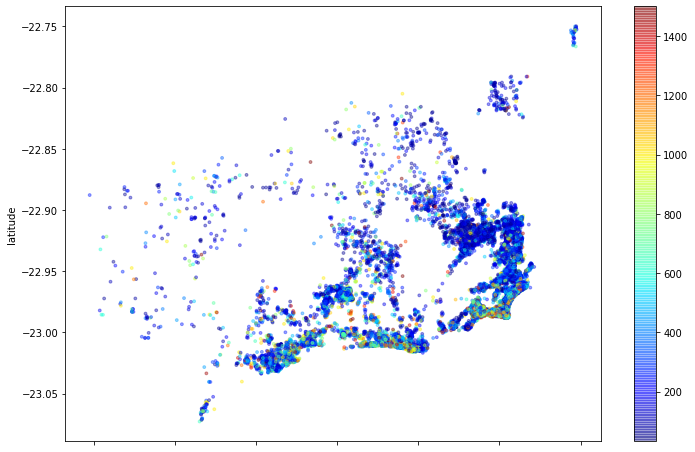

In [17]:
# plotar os imóveis pela latitude-longitude
df_trat.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_trat['price'],
             s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

Apenas a título de curiosidade, e para melhor vizualização da localização dos imóveis mais caros, será quantificado os bairros com diárias maiores que R$ 1000,00.

Total de habitações caras: 2319 



neighbourhood
Copacabana                  598
Ipanema                     363
Barra da Tijuca             325
Leblon                      193
Jacarepaguá                 153
Recreio dos Bandeirantes    130
Botafogo                     55
Lagoa                        43
Leme                         34
Santa Teresa                 29
Tijuca                       27
Maracanã                     24
Laranjeiras                  23
Flamengo                     22
Centro                       19
Gávea                        19
São Conrado                  18
Jardim Botânico              16
Vila Isabel                  15
Humaitá                      13
Name: price, dtype: int64

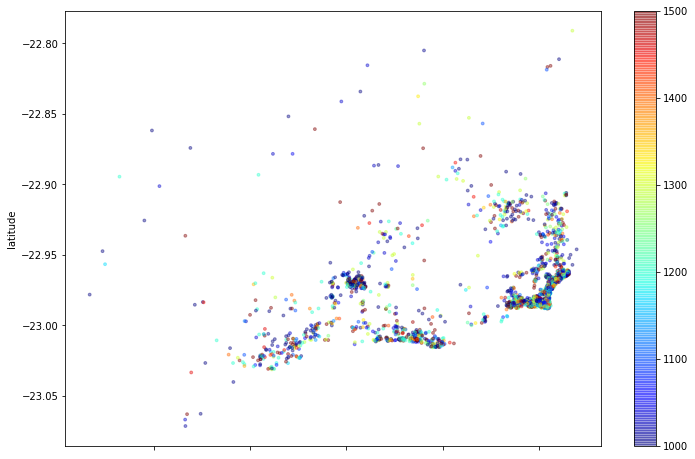

In [18]:
#remover os outliers em um novo DataFrame
df_caros = df_trat.copy()
df_caros.drop(df_caros[df_caros.price < 1000].index, axis = 0, inplace = True)

print('Total de habitações caras:',df_caros.shape[0],"\n")

df_caros.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_caros['price'],
             s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

bairrosmais = df_caros.groupby(['neighbourhood']).price.count().sort_values(ascending = False)[:20]
display(bairrosmais)


Estrelam o **Top 3** de bairros com maior número de diárias acima de **R$ 1000,00**: **Copacabana, Ipanema e Barra da Tijuca.**

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [19]:
# ver a média da coluna `minimum_nights``
df_trat['minimum_nights'].describe()

count    23146.000000
mean         3.526959
std          4.218445
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         30.000000
Name: minimum_nights, dtype: float64

A função `describe()` revelou que a média de mínimo de noites exigidas para a reserva. Porém, percebe-se também que a maioria das vagas exigem o mínimo de 2 noites ou menos. Mais uma vez mostrando que o Rio de Janeiro tem vagas para todos os bolsos e objetivos.

## Conclusões


Os dados resumidos disponibilizados pelo portal Insider Airbnb sobre as habitações oferecidas pela plataforma Airbnb para a cidade do Rio de Janeiro trouxeram um panorama geral sobre as características e preferências de hospedagem.

Percebe-se uma grande variedade de preços, tipos de acomodações e quantidade de noites mínimas para atender a todos os públicos e objetivos.